<a href="https://colab.research.google.com/github/yuvrajdevrukhkar/DLLab/blob/main/Prac3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 [==============================] - 2s 0us/step
Epoch 1/10
1407/1407 [==============================] - 65s 45ms/step - loss: 1.5236 - accuracy: 0.4463 - val_loss: 1.2079 - val_accuracy: 0.5718
Epoch 2/10
1407/1407 [==============================] - 60s 43ms/step - loss: 1.1542 - accuracy: 0.5906 - val_loss: 1.1211 - val_accuracy: 0.6010
Epoch 3/10
1407/1407 [==============================] - 59s 42ms/step - loss: 1.0034 - accuracy: 0.6477 - val_loss: 0.9641 - val_accuracy: 0.6654
Epoch 4/10
1407/1407 [==============================] - 62s 44ms/step - loss: 0.8987 - accuracy: 0.6820 - val_loss: 0.9577 - val_accuracy: 0.6718
Epoch 5/10
1407/1407 [==============================] - 60s 42ms/step - loss: 0.8217 - accuracy: 0.7124 - val_loss: 0.8496 - val_accuracy: 0.7098
Epoch 6/10
1407/1407 [==============================] - 61s 43ms/step - loss: 0.7578 - accuracy: 0.7338 - val_loss: 0.8765 - val_accuracy: 0.6954
Epoch 7/10
1407/1407 [==============================] - 5

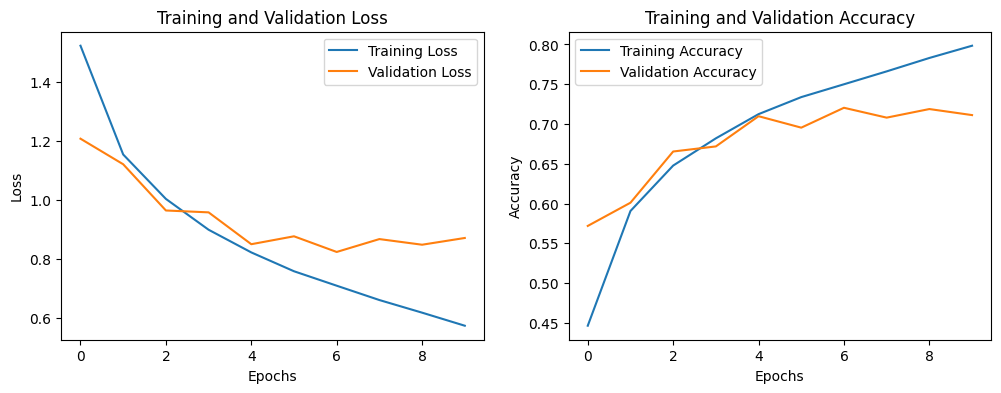

In [ ]:
# Import necessary packages
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

# Define parameters
batch_size = 32
epochs = 10
input_shape = (32, 32, 3)  # Input image dimensions for CIFAR-10

# Stage 1: Loading and preprocessing the image data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Stage 2: Defining the model's architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Stage 3: Training the model
history = model.fit(x_train, y_train, epochs=epochs, validation_split=0.1)

# Stage 4: Estimating the model’s performance
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()
